In [1]:
import pandas as pd
import numpy as np

In [35]:
nottem_df=pd.read_csv('./Data/TimeSeries_LYNX_Nottem/nottem.csv',names=['temperature'],header=0)

In [4]:
help(pd.date_range)


Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs) -> pandas.core.indexes.datetimes.DatetimeIndex
    Return a fixed frequency DatetimeIndex.
    
    Parameters
    ----------
    start : str or datetime-like, optional
        Left bound for generating dates.
    end : str or datetime-like, optional
        Right bound for generating dates.
    periods : int, optional
        Number of periods to generate.
    freq : str or DateOffset, default 'D'
        Frequency strings can have multiples, e.g. '5H'. See
        :ref:`here <timeseries.offset_aliases>` for a list of
        frequency aliases.
    tz : str or tzinfo, optional
        Time zone name for returning localized DatetimeIndex, for example
        'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
        timezone-naive.
    normalize : bool, default False
        Normalize start/

In [13]:
nottem_df

,temperature
1,40.6
2,40.8
3,44.4
4,46.7
5,54.1
...,...
236,61.8
237,58.2
238,46.7
239,46.6


In [18]:
nottem_series=pd.Series(nottem_df['temperature'].values,index=pd.date_range('31-01-1920',periods=240,freq='M'))

In [19]:
nottem_series

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
              ... 
1939-08-31    61.8
1939-09-30    58.2
1939-10-31    46.7
1939-11-30    46.6
1939-12-31    37.8
Freq: M, Length: 240, dtype: float64

In [36]:
nottem_df.index=pd.date_range('31-01-1920',periods=240,freq='M')

In [37]:
nottem_df

,temperature
1920-01-31,40.6
1920-02-29,40.8
1920-03-31,44.4
1920-04-30,46.7
1920-05-31,54.1
...,...
1939-08-31,61.8
1939-09-30,58.2
1939-10-31,46.7
1939-11-30,46.6


In [31]:
from fbprophet import Prophet

In [32]:
help(Prophet)

Help on class Prophet in module fbprophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniforml

now we need to prepare the df so that fbprophet is able to consume it.For that the target column need to be named 'Y' and
the time sereis needs to be named as 'ds'.

In [39]:
nottem_df.columns=['y']

In [45]:
nottem_df['ds']=nottem_df.index

In [46]:
nottem_df

,y,ds
1920-01-31,40.6,1920-01-31
1920-02-29,40.8,1920-02-29
1920-03-31,44.4,1920-03-31
1920-04-30,46.7,1920-04-30
1920-05-31,54.1,1920-05-31
...,...,...
1939-08-31,61.8,1939-08-31
1939-09-30,58.2,1939-09-30
1939-10-31,46.7,1939-10-31
1939-11-30,46.6,1939-11-30


In [59]:
nottem_df.reset_index(drop=True,inplace=True)

In [60]:
nottem_df

,y,ds
0,40.6,1920-01-31
1,40.8,1920-02-29
2,44.4,1920-03-31
3,46.7,1920-04-30
4,54.1,1920-05-31
...,...,...
235,61.8,1939-08-31
236,58.2,1939-09-30
237,46.7,1939-10-31
238,46.6,1939-11-30


In [62]:
nottem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       240 non-null    float64       
 1   ds      240 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [63]:
mymodel=Prophet()

In [64]:
mymodel.fit(nottem_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [68]:
help(future_data)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index: Union[Collection, NoneType] = None, columns: Union[Collection, NoneType] = None, dtype: Union[str, numpy.dtype, ForwardRef('ExtensionDtype'), NoneType] = None, copy: bool = False)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects.
 |  
 |      .. versionchanged:: 0.23.0
 |         If data is a dict, column order follows insertion-order for
 |         Python 3.6 and later.
 |  
 |      .. versionchanged:: 0.25.

In [66]:
future_data=mymodel.make_future_dataframe(periods=12,freq='M')

In [69]:
help(mymodel.predict)

Help on method predict in module fbprophet.forecaster:

predict(df=None) method of fbprophet.forecaster.Prophet instance
    Predict using the prophet model.
    
    Parameters
    ----------
    df: pd.DataFrame with dates for predictions (column ds), and capacity
        (column cap) if logistic growth. If not provided, predictions are
        made on the history.
    
    Returns
    -------
    A pd.DataFrame with the forecast components.



In [70]:
fcast=mymodel.predict(future_data)

In [71]:
fcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1920-01-31,48.851386,37.063927,42.795074,48.851386,48.851386,-9.020067,-9.020067,-9.020067,-9.020067,-9.020067,-9.020067,0.0,0.0,0.0,39.831319
1,1920-02-29,48.842828,35.819146,41.442126,48.842828,48.842828,-10.258836,-10.258836,-10.258836,-10.258836,-10.258836,-10.258836,0.0,0.0,0.0,38.583992
2,1920-03-31,48.833681,39.430337,44.911105,48.833681,48.833681,-6.626385,-6.626385,-6.626385,-6.626385,-6.626385,-6.626385,0.0,0.0,0.0,42.207295
3,1920-04-30,48.824828,43.131328,48.734915,48.824828,48.824828,-2.773119,-2.773119,-2.773119,-2.773119,-2.773119,-2.773119,0.0,0.0,0.0,46.051709
4,1920-05-31,48.815681,50.516049,56.300338,48.815681,48.815681,4.459758,4.459758,4.459758,4.459758,4.459758,4.459758,0.0,0.0,0.0,53.275439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1940-08-31,49.745100,58.241414,63.587181,49.741837,49.747792,11.163032,11.163032,11.163032,11.163032,11.163032,11.163032,0.0,0.0,0.0,60.908132
248,1940-09-30,49.752642,54.263514,59.860109,49.748377,49.756276,7.422437,7.422437,7.422437,7.422437,7.422437,7.422437,0.0,0.0,0.0,57.175079
249,1940-10-31,49.760435,48.011423,53.481299,49.755321,49.764961,0.931907,0.931907,0.931907,0.931907,0.931907,0.931907,0.0,0.0,0.0,50.692343
250,1940-11-30,49.767977,39.899780,45.561700,49.761746,49.773222,-6.941571,-6.941571,-6.941571,-6.941571,-6.941571,-6.941571,0.0,0.0,0.0,42.826407


<Figure size 864x576 with 0 Axes>

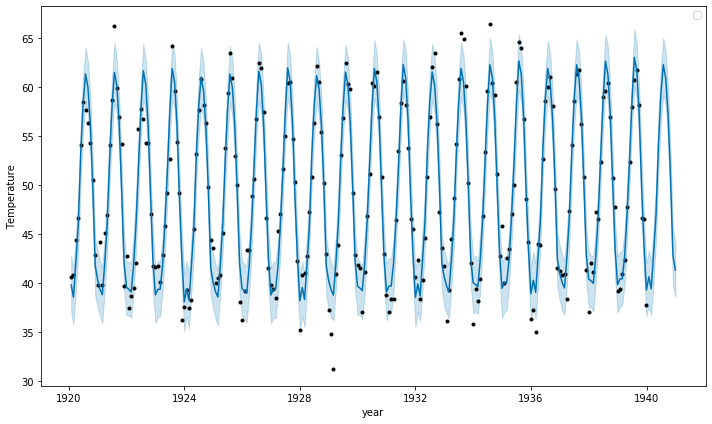

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
mymodel.plot(fcast)
plt.grid(axis='both')
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend()

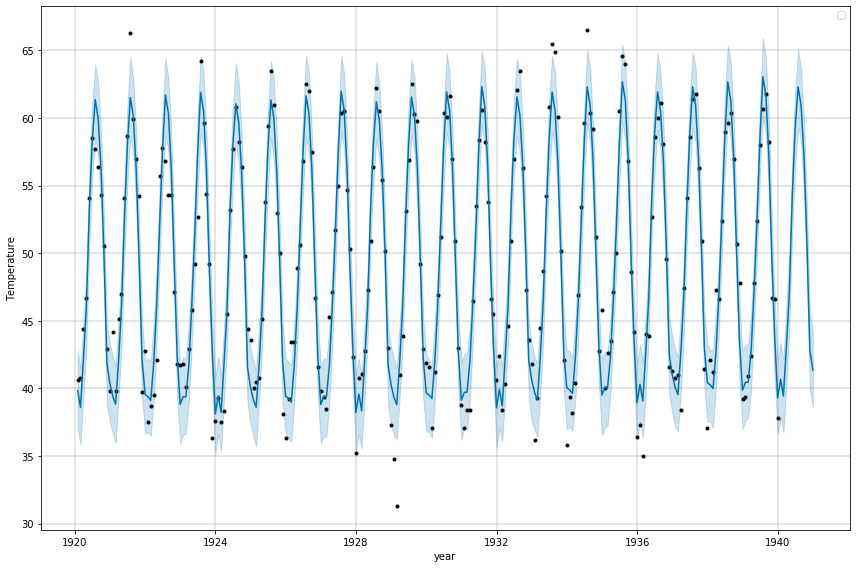

In [81]:
import matplotlib.pyplot as plt
fig,ax1=plt.subplots(1,1,figsize=(12,8))
mymodel.plot(fcast,ax=ax1)
plt.grid(axis='both',lw=2)
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend()

In [80]:
help(plt.grid)

Help on function grid in module matplotlib.pyplot:

grid(b=None, which='major', axis='both', **kwargs)
    Configure the grid lines.
    
    Parameters
    ----------
    b : bool or None, optional
        Whether to show the grid lines. If any *kwargs* are supplied,
        it is assumed you want the grid on and *b* will be set to True.
    
        If *b* is *None* and there are no *kwargs*, this toggles the
        visibility of the lines.
    
    which : {'major', 'minor', 'both'}, optional
        The grid lines to apply the changes on.
    
    axis : {'both', 'x', 'y'}, optional
        The axis to apply the changes on.
    
    **kwargs : `.Line2D` properties
        Define the line properties of the grid, e.g.::
    
            grid(color='r', linestyle='-', linewidth=2)
    
        Valid *kwargs* are
    
      agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
      alpha: float
      animated: bool
      ant